# Vegetarian Pizza -- A Typology

## Pizza

I love me a good pizza slice. Cheesy. Crunchy. Satisfying.

So it was a big surprise when I moved to California's Bay Area and had my first encounter with the only-vegetarian pizza place that would change my life: The Cheeseboard. I took one bite of their pizza and have hated every other pizza place since. 

But I'm under quarantine right now, which means I can't visit The Cheeseboard, which means I must make my own.

My background is one of content product analysis, so I'm familiar with using multidimensional scaling (MDS) to compare  similarities or differences between two sets.

So I wondered could use this tool to help me define "vegetarian pizza master recipes" based on pizza features?

As it turns out: yes. Yes, I could.

## Sampling

First, the data. The Cheeseboard, being a pizza place in silicon valley, has had an online presence for a while. This allowed me to have access to their past menus through The Wayback Machine.

I built a quick program to go through snapshots of The Cheeseboard's webpage stored by The Wayback Machine.

In [1]:
#helpful source: https://medium.com/analytics-vidhya/the-wayback-machine-scraper-63238f6abb66

In [106]:
#!/usr/bin/env python
import sys
import requests as rq
from bs4 import BeautifulSoup as bs
from time import sleep
from time import time
from random import randint
from warnings import warn
import json
import pandas as pd
import numpy as np
from datetime import date, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import graphviz

%matplotlib

# from google.colab import drive
# drive.mount('drive')

Using matplotlib backend: MacOSX


 

*   First, we'll generate a list of the snapshots stored by the wayback machine.
*   Then, explore what these pages look like using beautiful soup.
*   Finally, once we know what features we're looking for in the soup, we'll pull the data from each page on the list.


In [4]:
# # Cheeseboard Wayback machine archive urls
# url = 'http://web.archive.org/cdx/search/cdx?url=http://cheeseboardcollective.coop/pizza&collapse=digest&to=20190101&output=json'
# urls = rq.get(url).text
# parse_url = json.loads(urls) #parses the JSON from urls.

# ## Extracts timestamp and original columns from urls and compiles a url list.
# url_list = []
# for i in range(1,len(parse_url)):
#     orig_url = parse_url[i][2]
#     tstamp = parse_url[i][1]
#     waylink = tstamp+'/'+orig_url
#     # print (waylink)
#     url_list.append(waylink)

# ## Compiles final url pattern.
# for url in url_list:
#     final_url = 'https://web.archive.org/web/'+url

In [5]:
# # Open page
# req = rq.get('https://web.archive.org/web/'+str(url_list[1])).text
# # parse html using beautifulsoup and store in soup
# soup = bs(req,'html.parser')
# soup

In [6]:
# # Get list of article tags that contain news titles
# menus = soup.find_all("div", {"class": "column"})
# # menus = soup.find_all("div", {"class": "menu"})


# menus_list = []
# for menu in menus:
#   menu = menu.find('p').getText()
#   menu = str(menu)
#   menus_list.append(menu)
  


In [7]:
# len('20181230025202')

There seems to have been a revamp in 2018.

This means dates before 2019-01-01 hold the menu in a specific kind of div, while after that date another div is used. To solve this issue we'll just go through the loop twice once for all dates before 2019 and once for all dates since.

The first loop will use the list already generated (before 2019).

In [8]:
# #pages = [str(i) for i in range(1,371)]

# reqs = 0

# start_time = time()

# all_menus = []
# all_dates = []

# for url in url_list:
    
#     full_url = 'https://web.archive.org/web/'+url
    
#     #open page
#     try:
#         pg = rq.get(full_url).text
#     except urllib.error.HTTPError as e:
#         print('Error: {}'.format(e))
#     except urllib.error.URLError as e:
#         print('Error: {}'.format(e.reason))
        
#     sleep(randint(10,20))
#     reqs +=1
    
#     # Calculate elapsed time between requests
#     elapsed_time = time() - start_time
#     print('Request: {}; Frequency: {} requests/s'.format(reqs,reqs/elapsed_time))
    

    
#     #Break once the max pages is reached
#     if reqs > len(url_list):
#       warn('No. of requests was greater than expected')
#       break
        
#     # parse html using beautifulsoup and store in soup
#     soup = bs(pg,'html.parser')
    
#     #find all news containers
#     menus = soup.find_all("div", {"class": "column"})
    
#     # parse through news containers to get info
#     for menu in menus:
#       try:
#         menu = menu.find('p').getText()
#         menu = str(menu)
#         print (menu)
#         all_menus.append(menu)
#         date = str(url)[:14]
#         all_dates.append(date)
#       except:
#         pass

In [9]:
# df_1 = pd.DataFrame(all_menus,columns=['menus'])
# df_1 = df_1.assign(time_stamps=all_dates) 

Now, we'll go through the same loop, but for dates after 2019-01-01. This also means we have to change the div tag we're focusing on.

In [10]:
# # Cheeseboard Wayback machine archive urls
# url = 'http://web.archive.org/cdx/search/cdx?url=http://cheeseboardcollective.coop/pizza&collapse=digest&from=20190101&output=json'
# urls = rq.get(url).text
# parse_url = json.loads(urls) #parses the JSON from urls.

# ## Extracts timestamp and original columns from urls and compiles a url list.
# url_list = []
# for i in range(1,len(parse_url)):
#     orig_url = parse_url[i][2]
#     tstamp = parse_url[i][1]
#     waylink = tstamp+'/'+orig_url
#     # print (waylink)
#     url_list.append(waylink)
# ## Compiles final url pattern.
# for url in url_list:
#     final_url = 'https://web.archive.org/web/'+url

# # # check right find_all
# # # Open page
# # req = rq.get('https://web.archive.org/web/'+str(url_list[1])).text
# # # parse html using beautifulsoup and store in soup
# # soup = bs(req,'html.parser')
# # soup

# # # Get list of article tags that contain news titles
# # menus = soup.find_all("div", {"class": "menu"})


# # menus_list = []
# # for menu in menus:
# #   menu = menu.find('p').getText()
# #   menu = str(menu)
# #   menus_list.append(menu)

# # print (menus_list)

# reqs = 0

# start_time = time()

# all_menus = []
# all_dates = []

# for url in url_list:
    
#     full_url = 'https://web.archive.org/web/'+url
    
#     #open page
#     try:
#         pg = rq.get(full_url).text
#     except urllib.error.HTTPError as e:
#         print('Error: {}'.format(e))
#     except urllib.error.URLError as e:
#         print('Error: {}'.format(e.reason))
        
#     sleep(randint(10,20))
#     reqs +=1
    
#     # Calculate elapsed time between requests
#     elapsed_time = time() - start_time
#     print('Request: {}; Frequency: {} requests/s'.format(reqs,reqs/elapsed_time))
    

    
#     #Break once the max pages is reached
#     if reqs > len(url_list):
#       warn('No. of requests was greater than expected')
#       break
        
#     # parse html using beautifulsoup and store in soup
#     soup = bs(pg,'html.parser')
    
#     #find all news containers
#     menus = soup.find_all("div", {"class": "menu"})
    
#     # parse through news containers to get info
#     for menu in menus:
#       try:
#         menu = menu.find('p').getText()
#         menu = str(menu)
#         print (menu)
#         all_menus.append(menu)
#         date = str(url)[:14]
#         all_dates.append(date)
#       except:
#         pass

# df_2 = pd.DataFrame(all_menus,columns=['menus'])
# df_2 = df_2.assign(time_stamps=all_dates)

# df_2.head(20)

In [11]:
# # # now we concat
# # df = pd.concat([df_1, df_2], axis = 0, ignore_index=True)

# # # save work
# # df.to_csv('./veggie_menus.csv', index = False)
# # !cp veggie_menus.csv "drive/My Drive/pupusas_cuadradas"

# df = pd.read_csv('./veggie_menus.csv')
# df.head(10)

With data in hand, time for clean up.

* Clean Issues
  * Timestamps wrong data type
  * duplicates exist (we can drop since they don't provide extra info)
  * menu has NaNs
  * Non-menu information pulled as menu (i.e. open hours)
  * Description before menu need to be removed
  * some menus have pizza have titles
  * some pizzas have garnishes

* Tidiness Issues
  * Menu ingredients should have their own column


In [12]:
# title = df_copy[df_copy.menus.str.contains(':')]["menus"].str.split(":", expand = True) 

# title.iloc[2][1]
# df_copy.iloc[2]['title']

In [13]:
# # make copy
# df_copy = df.copy()

# # change dtype
# df_copy['time_stamps'] = pd.to_datetime(df_copy['time_stamps'], format='%Y%m%d%H%M%S')

# # drop duplicates
# df_copy.drop_duplicates(inplace=True)

# # reset index
# df_copy.reset_index(inplace=True)

# # drop nans
# df_copy = df_copy.dropna(subset=['menus'])

# # drop closed days
# df_copy = df_copy[~df_copy.menus.str.lower().str.contains("close")]
# df_copy = df_copy[~df_copy.menus.str.lower().str.contains("open")]


# # drop weird descriptions
# df_copy['menus'] = df_copy['menus'].str.replace(r'\*\*\*(?<=\*\*\*).*?(?=\*\*\*)\*\*\*', '')
# df_copy['menus'] = df_copy['menus'].str.replace(r'\*\*(?<=\*\*).*?(?=\*\*)\*\*', '')


# # remove word and to create proper lists (with serial commas first, without after)
# df_copy['menus'] = df_copy['menus'].str.replace(', and',',')
# df_copy['menus'] = df_copy['menus'].str.replace('and',',')


# # get garnish
# new = df_copy["menus"].str.split(";", expand = True) 
  
# # making separate first name column from new data frame 
# df_copy["menus_clean"]= new[0]
# df_copy['menus_clean'] = df_copy['menus_clean'].str.lower()
  
# # making separate last name column from new data frame 
# df_copy["garnish"] = new[1] 


# #get title
# df_copy['title'] = np.nan

# titled = df_copy[df_copy.menus.str.contains(':')].copy()

# title = titled['menus_clean'].str.split(":", expand = True)

# df_copy.drop(df_copy[df_copy.menus.str.contains(':')].index, axis = 0, inplace = True)

# # making separate first name column from new data frame 
# titled["menus_clean"]= title[1]
# titled['menus_clean'] = titled['menus_clean'].str.lower()
  
# # making separate last name column from new data frame 
# titled["title"] = title[0]

# df_copy = pd.concat([df_copy, titled], axis = 0, ignore_index=True)


# # Dropping old Name columns 
# df_copy.rename(columns={"menus": "raw_menus", 'index': 'pizza_index'}, inplace=True)

# df_copy.to_csv('./veggie_menus_2.csv', index = False)

# df_copy


In [14]:
# # Now, we'll solve the tidiness issue of "one variable per column" by listing a single ingredient per row
# df_copy['ingredients'] = df_copy['menus_clean'].copy()

# df_copy['ingredients'] = df_copy['ingredients'].str.replace(', ',',')
# df_copy['ingredients'] = df_copy['ingredients'].apply(lambda x: x.split(','))

# df_copy = df_copy.explode('ingredients')

In [15]:
# df_copy.to_csv('./veggie_menus_3.csv', index = False)
# # !cp veggie_menus_2.csv "drive/My Drive/pupusas_cuadradas"

# df_copy = pd.read_csv('./veggie_menus_3.csv')

At this point I cleaned manually. as it seemed a bit faster.




## Data Wrangling

### Pizza Features
1. **season**: in which season was it made?
2. **cheese**: is there cheese?
3. **brassicas**: are there a brassicas?
4. **squashes**: are there squashes?
5. **allium**: are there alliums?
6. **roots**: are there roots?
7. **mushroom**: are there mushrooms?
8. **tomato**: are there tomatoes?
9. **greens**: are there greens?
10. **flowers**: does it have flowers? (think: asparagus and artichokes)
11. **fresh_cheese**: does it have fresh cheese?
12. **pasta_filata**: does it have italian stretched cheeses?
13. **soft_ripened**: does it have soft ripened cheese?
14. **semi_soft**: does it have semi soft cheese?
15. **wash_rind**: does it have a wash rind cheese?
16. **blue_cheese**: does it have a blue cheese?
17. **semi_hard**: does it have a semi hard cheese?
18. **hard_cheese**: does it have a hard cheese?

In [81]:
# df_og = pd.read_csv('drive/My Drive/pupusas_cuadradas/veggie_menus_4.csv')
df_og = pd.read_csv('./veggie_menus_4.csv')

df = df_og.copy()

In [82]:
# shoutout: https://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [83]:
# df[df['ingredients'] == ''].count()

df['time_stamps'] = pd.to_datetime(df['time_stamps'])

df['season'] = df['time_stamps'].apply(lambda x: get_season(x))

df['cheese'] = df['menus_clean'].str.lower().str.contains(pat = 'cheese')

df

,pizza_index,raw_menus,time_stamps,menus_clean,garnish,title,ingredients,season,cheese
0,0,"Roma tomatoes with red onions, Bulgarian feta ...",2010-11-23 19:56:00,"roma tomatoes with red onions, bulgarian feta ...",NaN,NaN,feta cheese,autumn,True
1,0,"Roma tomatoes with red onions, Bulgarian feta ...",2010-11-23 19:56:00,"roma tomatoes with red onions, bulgarian feta ...",NaN,NaN,fresh cilantro,autumn,True
2,0,"Roma tomatoes with red onions, Bulgarian feta ...",2010-11-23 19:56:00,"roma tomatoes with red onions, bulgarian feta ...",NaN,NaN,garlic olive oil,autumn,True
3,0,"Roma tomatoes with red onions, Bulgarian feta ...",2010-11-23 19:56:00,"roma tomatoes with red onions, bulgarian feta ...",NaN,NaN,lemon juice,autumn,True
4,0,"Roma tomatoes with red onions, Bulgarian feta ...",2010-11-23 19:56:00,"roma tomatoes with red onions, bulgarian feta ...",NaN,NaN,lemon zest,autumn,True
...,...,...,...,...,...,...,...,...,...
1346,488,"Cremini mushroom, truffle Pecorino cheese, m...",2020-06-17 04:47:00,"cremini mushroom, truffle pecorino cheese, m...",NaN,NaN,cremini mushroom,spring,True
1347,488,"Cremini mushroom, truffle Pecorino cheese, m...",2020-06-17 04:47:00,"cremini mushroom, truffle pecorino cheese, m...",NaN,NaN,garlic olive oil,spring,True
1348,488,"Cremini mushroom, truffle Pecorino cheese, m...",2020-06-17 04:47:00,"cremini mushroom, truffle pecorino cheese, m...",NaN,NaN,italian parsley,spring,True
1349,488,"Cremini mushroom, truffle Pecorino cheese, m...",2020-06-17 04:47:00,"cremini mushroom, truffle pecorino cheese, m...",NaN,NaN,mozzarella cheese,spring,True


In [84]:
# now we'll explore veggie types

# brasicas
brassicas = ['broccoli', 'cauliflower', 'cabbage', 'choy sum', 'rutabaga','turnip', 'kale']
brassicas_list = "|".join(brassicas)
df['brassica'] = df['menus_clean'].str.lower().str.contains(pat = brassicas_list)

# squash
squashes = ['summer squash', 'zuchinni', 'butternut', 'pumpkin', 'squash']
squashes_list = "|".join(squashes)
df['summer_squash'] = df['menus_clean'].str.lower().str.contains(pat = squashes_list)

# allium
alliums = ['onion', 'leek', 'garlic', 'shallot']
alliums_list = "|".join(alliums)
df['allium'] = df['menus_clean'].str.lower().str.contains(pat = alliums_list)

# roots
roots = ['potato', 'parsnip', 'beet', 'parsnip', 'carrot']
roots_list = "|".join(roots)
df['roots'] = df['menus_clean'].str.lower().str.contains(pat = roots_list)

# mushroom
shrooms = ['mushroom', 'cremini', 'crimini', 'shitake']
shrooms_list = "|".join(shrooms)
df['shrooms'] = df['menus_clean'].str.lower().str.contains(pat = shrooms_list)

# veggies
tomatoes = ['tomato', 'tomatoes', 'bell pepper', 'corn', 'fennel']
tomatoes_list = "|".join(shrooms)
df['tomatoes'] = df['menus_clean'].str.lower().str.contains(pat = tomatoes_list)

# greens
greens = ['chard', 'spinach', 'endive', 'kale', 'arugula']
greens_list = "|".join(shrooms)
df['greens'] = df['menus_clean'].str.lower().str.contains(pat = greens_list)

# flowers
flowers = ['artichoke', 'asparagus']
flowers_list = "|".join(shrooms)
df['flowers'] = df['menus_clean'].str.lower().str.contains(pat = flowers_list)

# fruits
fruits = ['pear', 'peach', 'fig']
fruits_list = "|".join(fruits)
df['fruits'] = df['menus_clean'].str.lower().str.contains(pat = fruits_list)

# citrus
citrus = ['lemon', 'lime', 'orange']
citrus_list = "|".join(citrus)
df['citrus'] = df['menus_clean'].str.lower().str.contains(pat = citrus_list)

# herbs
herbs = ['basil', 'cilantro', 'parsley', 'herbs', 'oregano']
herbs_list = "|".join(herbs)
df['herbs'] = df['menus_clean'].str.lower().str.contains(pat = herbs_list)

df.sample(5)


,pizza_index,raw_menus,time_stamps,menus_clean,garnish,title,ingredients,season,cheese,brassica,summer_squash,allium,roots,shrooms,tomatoes,greens,flowers,fruits,citrus,herbs
256,92,"Roma tomatoes, onions, mozzarella , feta chees...",2013-12-18 11:56:00,"roma tomatoes, onions, mozzarella , feta chees...",NaN,NaN,onion,autumn,True,False,False,True,False,False,False,False,False,False,True,True
876,319,"Corn, red onion, Valbreso feta cheese, mozzare...",2019-09-17 05:12:00,"corn, red onion, valbreso feta cheese, mozzare...",garnished with house made avocado sauce,NaN,red onion,summer,True,False,False,True,False,False,False,False,False,False,False,False
582,224,"Pizza: En-corn! (by popular dem, one more day ...",2016-10-26 04:48:00,"en-corn! (by popular dem, one more day of cor...",NaN,pizza,garlic olive oil,autumn,True,False,False,True,False,False,False,False,False,False,True,True
1319,481,"In celebration of Juneteenth!Okra, tomato, Sk...",2020-06-17 04:47:00,"in celebration of juneteenth!okra, tomato, sk...",NaN,NaN,cilantro,spring,True,False,False,True,False,False,False,False,False,False,False,True
932,339,"Organic tomato (Oya Organics), onion, Fontina ...",2019-10-01 09:49:00,"organic tomato (oya organics), onion, fontina ...","garnished with garlic olive oil, Italian par...",NaN,mozzarella cheese,autumn,True,False,False,True,False,False,False,False,False,False,False,False


In [86]:
# time to explore cheese types

# fresh
fresh = ['cottage cheese', 'chevre', 'cream cheese', 'mascarpone', 'ricotta', 'queso fresco']
fresh_list = "|".join(fresh)
df['fresh_cheese'] = df['menus_clean'].str.lower().str.contains(pat = fresh_list)

# pf
pasta_filata = ['mozzarella', 'burrata', 'provolone', 'queso Oaxaca', 'scamorza affumicata', 'caciocavallo']
pf_list = "|".join(pasta_filata)
df['pasta_filata'] = df['menus_clean'].str.lower().str.contains(pat = pf_list)

# soft_ripened
soft_ripened = ['ossau-iraty','feta','brie', 'camembert', 'cambozola']
soft_list = "|".join(soft_ripened)
df['soft_ripened'] = df['menus_clean'].str.lower().str.contains(pat = soft_list)


# semi_soft
semi_soft = ['fontina','havarti', 'muenster', 'jarlsberg', 'chaumes']
ss_list = "|".join(semi_soft)
df['semi_soft'] = df['menus_clean'].str.lower().str.contains(pat = ss_list)


# wash_rind
wash_rind = ['limburger', 'taleggio', 'epoisses', 'alsatian munster']
wash_list = "|".join(wash_rind)
df['wash_rind'] = df['menus_clean'].str.lower().str.contains(pat = wash_list)


# blue_cheese
blue_cheese = ['roquefort', 'stilton', 'gorgonzola', 'danish blue', 'blue cheese']
blue_list = "|".join(blue_cheese)
df['blue_cheese'] = df['menus_clean'].str.lower().str.contains(pat = blue_list)


# semi_hard
semi_hard = ['provolone','cheddar', 'gouda', 'edam', 'monterey jack', 'emmental', 'swiss','gruyere', 'comte']
sh_list = "|".join(semi_hard)
df['semi_hard'] = df['menus_clean'].str.lower().str.contains(pat = sh_list)


# hard_cheese
hard_cheese = ['parmesan','parmigiano-reggiano', 'asiago', 'pecorino', 'manchego']
hard_list = "|".join(hard_cheese)
df['hard_cheese'] = df['menus_clean'].str.lower().str.contains(pat = hard_list)

df

wrangled_df = df.copy()

## Exploration

Now, that we have features, we'll dive deep. Specifically, we're looking for
1. strong correlation between ingredients
2. how different are pizzas from one another (we think season might have something to do with that)

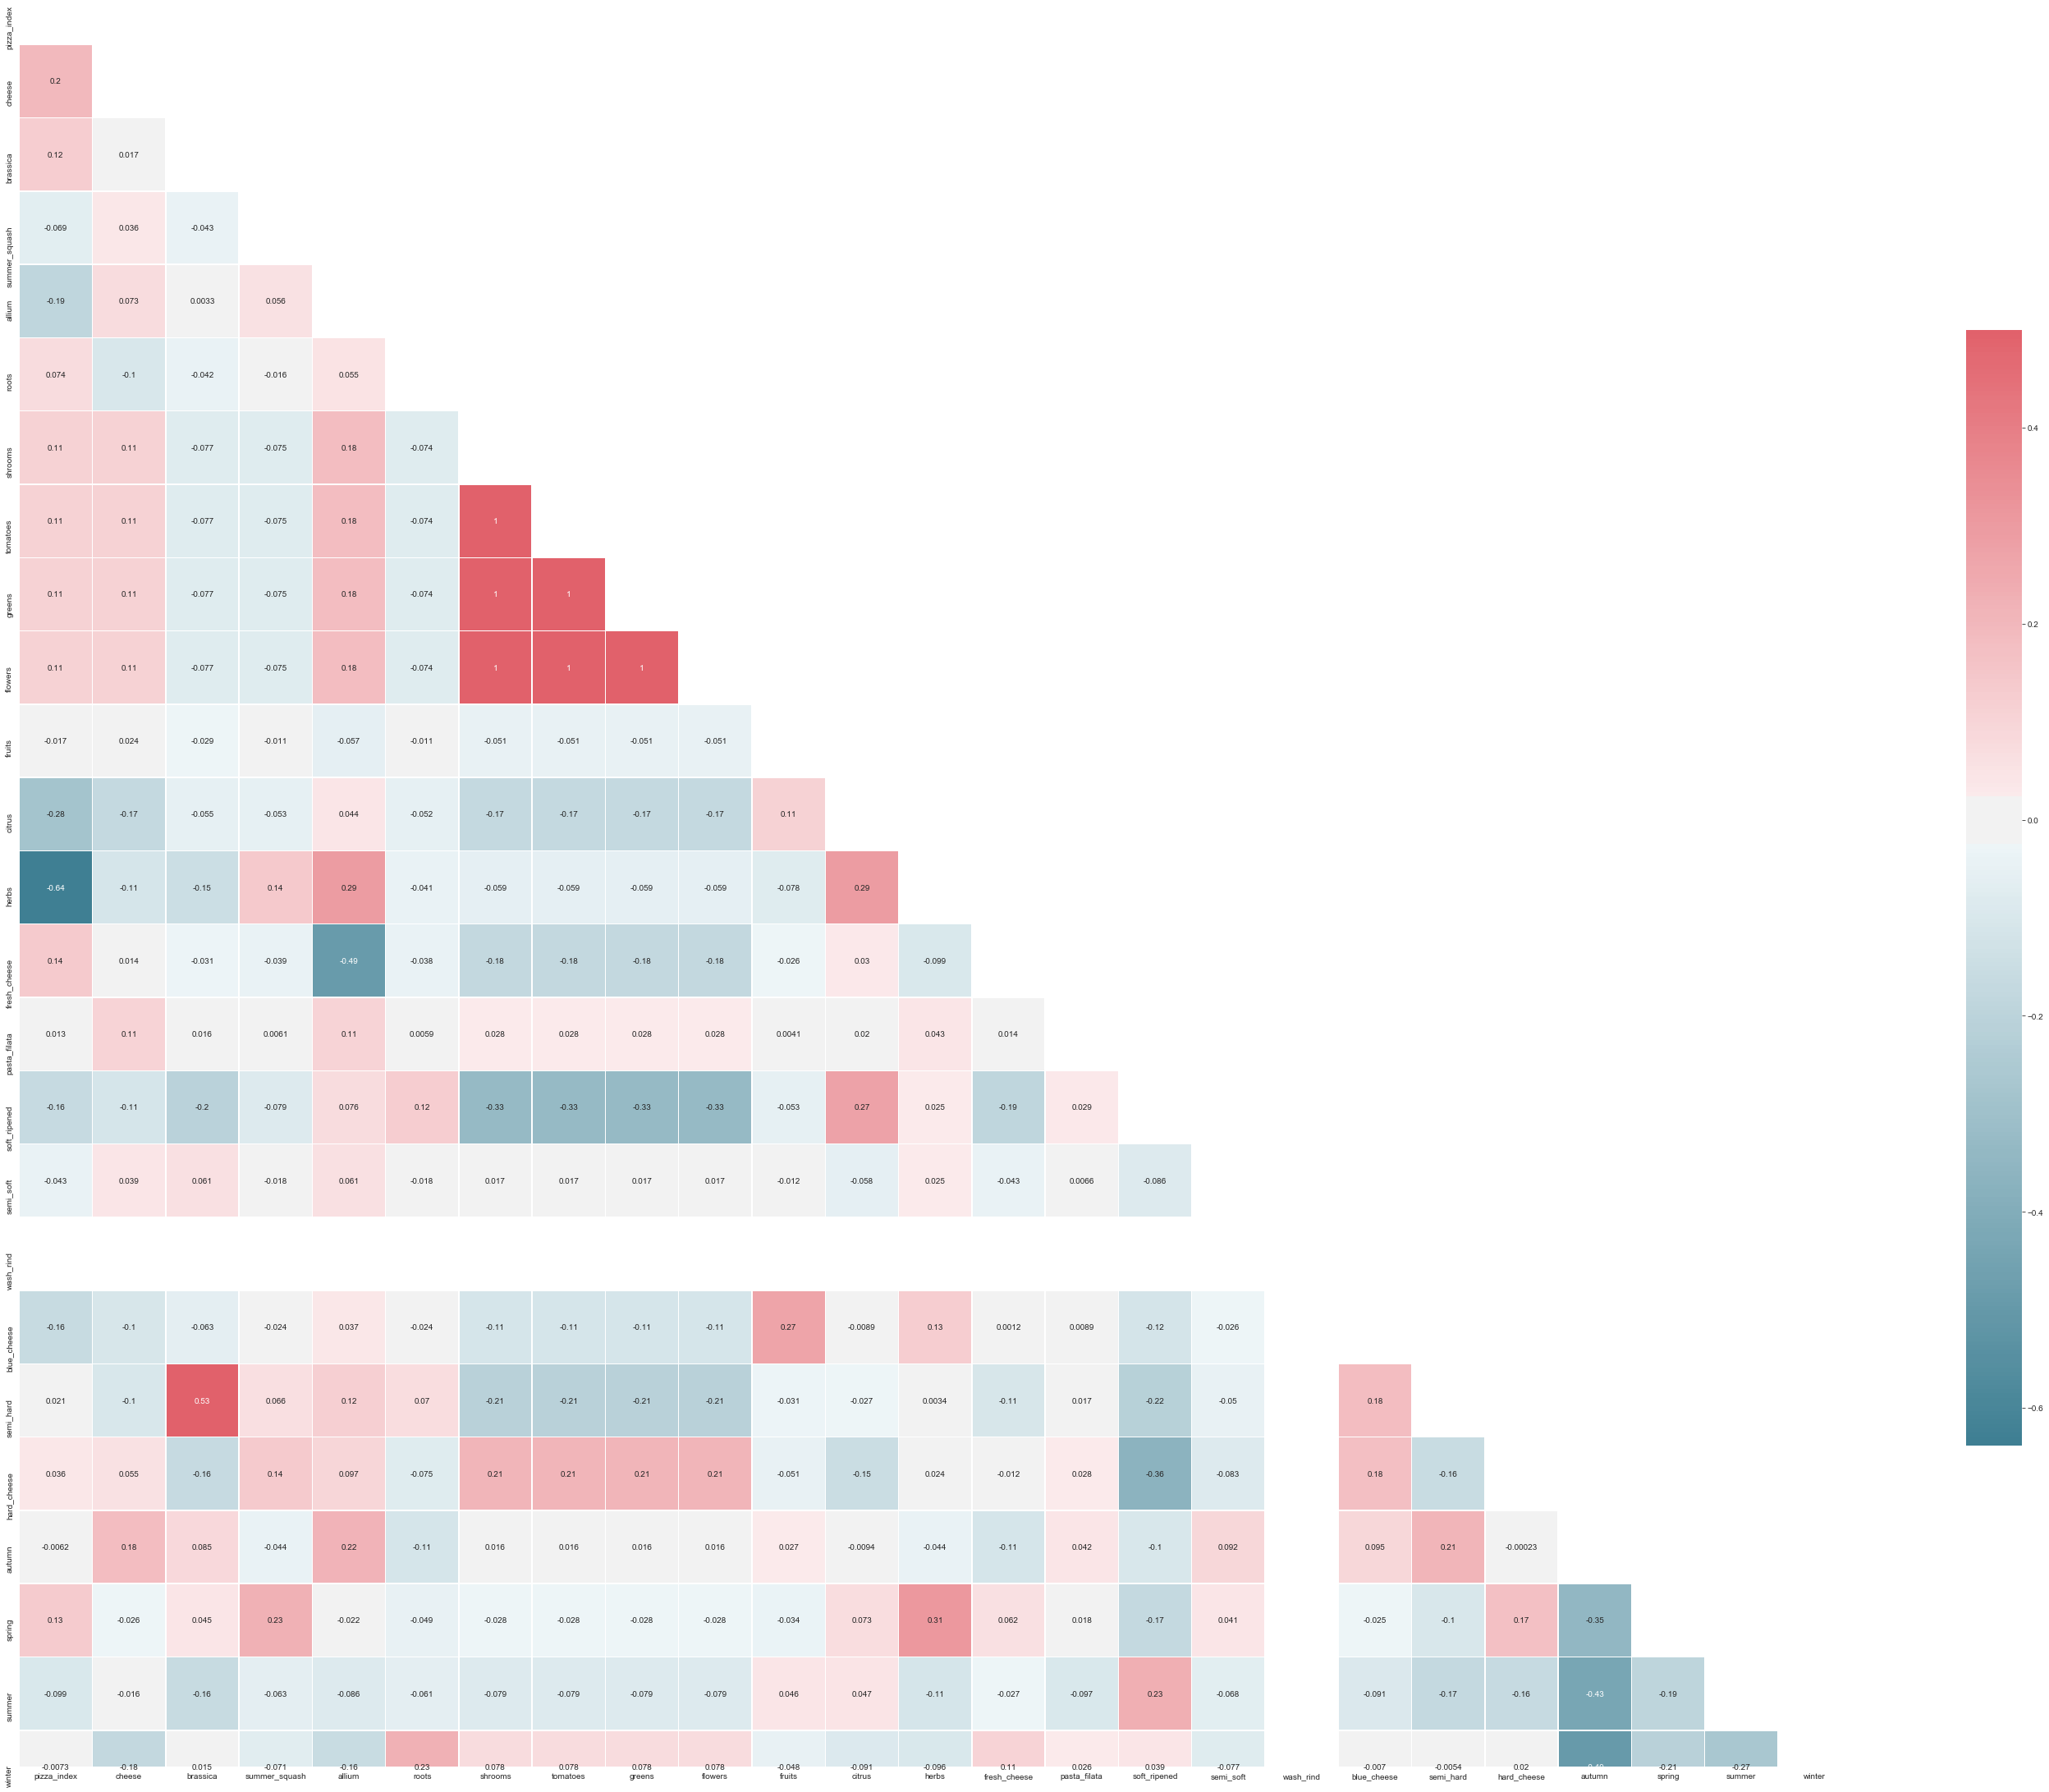

In [21]:
# since we think season will have a correlation, let's pop that column and find correlations
season_df = pd.get_dummies(df['season'])
df = pd.concat([df, season_df], axis = 1)

# finally, we'll see if there is a correlation between the popularity of a breed, it's interactiveness, and it's WeRateDogs rating.
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# labels = ['pizza_index', 'cheese', 'brassica', 'summer_squash', 'allium', 'roots', 'shrooms', 'tomatoes', 'greens', 'flowers', 'fresh_cheese', 'pasta_filata', 'soft_ripened', 'semi_soft', 'wash_rind', 'blue_cheese', 'semi_hard', 'hard_cheese', 'fruits', 'citrus', 'herbs', 'autumn', 'spring', 'summer', 'winter']
labels = list(corr.columns)
# Draw the heatmap with the mask and correct aspect ratio
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50, 50))
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, xticklabels= labels, yticklabels= labels, vmax=.5, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
# ax.figure.savefig("ingredients_cmatrix.png")
# !cp ingredients_cmatrix.png "drive/My Drive/pupusas_cuadradas"


In [24]:
# # we'll explore how pizza's differ to see if they cluster around similar ingredient combinations

# create new df contain only the features of each pizza
df_clean = df[list(corr.columns)].copy()

# drop duplicates generated when we created ingredient column
df_clean.drop_duplicates(subset=['pizza_index'],inplace=True)

df_clean

,pizza_index,cheese,brassica,summer_squash,allium,roots,shrooms,tomatoes,greens,flowers,...,soft_ripened,semi_soft,wash_rind,blue_cheese,semi_hard,hard_cheese,autumn,spring,summer,winter
0,0,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,1,0,0,0
7,2,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,0,0,1,0
15,4,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,0,0,1,0
22,6,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,0,0,1,0
27,8,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,484,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,0
1335,485,True,False,False,True,False,True,True,True,True,...,False,False,False,False,False,False,0,1,0,0
1339,486,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,0
1344,487,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,1,0,0


In [25]:
# set pizza_name as index to make difference matrix
pizza_name = df_clean.pizza_index
# set pizza_name as index
df_clean = df_clean.set_index(pizza_name)
# drop extra column
df_clean = df_clean.drop(['pizza_index'], axis=1)
# change bools to int
df_clean = df_clean*1
df_clean

,cheese,brassica,summer_squash,allium,roots,shrooms,tomatoes,greens,flowers,fruits,...,soft_ripened,semi_soft,wash_rind,blue_cheese,semi_hard,hard_cheese,autumn,spring,summer,winter
pizza_index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
485,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
486,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# create difference matrix

# create empty list to contain our measured differences
matrix = []


for i, column_i in enumerate(pizza_name):
    measure_list = []
    for j, column_j in enumerate(pizza_name):
        measure_list.append(abs(df_clean.iloc[i,:] - df_clean.iloc[j,:]).sum())
    matrix.append(measure_list)

In [27]:
distance_matrix = pd.DataFrame(matrix)
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0,3,4,5,2,3,3,4,5,4,...,6,9,4,5,9,6,9,4,5,9
1,3,0,3,2,5,4,4,7,8,7,...,7,10,5,6,10,7,10,5,6,10
2,4,3,0,3,2,5,5,4,5,4,...,4,7,2,5,7,4,7,2,5,7
3,5,2,3,0,5,2,2,7,6,7,...,7,8,5,6,10,7,8,5,6,10
4,2,5,2,5,0,3,3,2,3,2,...,4,7,2,5,7,4,7,2,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,6,7,4,7,4,7,7,6,7,6,...,0,7,2,3,7,0,7,2,3,7
276,9,10,7,8,7,8,8,9,8,9,...,7,0,5,6,2,7,0,5,6,2
277,4,5,2,5,2,5,5,4,5,4,...,2,5,0,3,5,2,5,0,3,5
278,5,6,5,6,5,6,6,7,6,7,...,3,6,3,0,8,3,6,3,0,8


In [28]:
distance_matrix.columns = pizza_name
distance_matrix = distance_matrix.set_index(pizza_name)
distance_matrix.columns.name = None
distance_matrix

,0,2,4,6,8,10,12,14,16,18,...,479,480,481,482,483,484,485,486,487,488
pizza_index,,,,,,,,,,,,,,,,,,,,,
0,0,3,4,5,2,3,3,4,5,4,...,6,9,4,5,9,6,9,4,5,9
2,3,0,3,2,5,4,4,7,8,7,...,7,10,5,6,10,7,10,5,6,10
4,4,3,0,3,2,5,5,4,5,4,...,4,7,2,5,7,4,7,2,5,7
6,5,2,3,0,5,2,2,7,6,7,...,7,8,5,6,10,7,8,5,6,10
8,2,5,2,5,0,3,3,2,3,2,...,4,7,2,5,7,4,7,2,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,6,7,4,7,4,7,7,6,7,6,...,0,7,2,3,7,0,7,2,3,7
485,9,10,7,8,7,8,8,9,8,9,...,7,0,5,6,2,7,0,5,6,2
486,4,5,2,5,2,5,5,4,5,4,...,2,5,0,3,5,2,5,0,3,5


In [29]:
import sklearn.metrics.pairwise as smp
import sklearn.manifold

# Here were going to find the local min/maxs
# the disimilarity parameter is referencing the distance matrix
# shift + tab will show parameters

# n_init: Number of times the k-means algorithm will be run with different centroid seeds. 
#         The final results will be the best output of n_init consecutive runs in terms of inertia.

# max_iter: Maximum number of iterations of the k-means algorithm for a single run.

mds = sklearn.manifold.MDS(dissimilarity = 'precomputed', n_init=10, max_iter=1000)

data2D = mds.fit_transform(distance_matrix)


In [34]:
data2D[:,0]

array([ 3.00570661,  5.81782717,  0.75897013,  4.12008332,  0.25582951,
        2.57225063,  2.57225063, -0.73287148,  0.78607461, -0.73287148,
        6.31621235, -5.48910127, -0.98577709,  3.63047868,  3.36767163,
       -0.61331612, -5.48910127,  4.61972886,  4.61972886,  6.462894  ,
       -0.98577709, -5.6364743 ,  3.36767163,  0.75897013, -4.7001305 ,
        0.65826219,  0.65826219, -4.7001305 , -4.7001305 , -4.7001305 ,
       -4.7001305 , -4.7001305 , -4.7001305 , -0.61225699, -0.61225699,
       -0.61225699, -0.61225699, -0.61225699, -0.61225699, -4.93578778,
        3.00570661,  3.00570661,  3.00570661,  5.81782717,  3.36767163,
        3.00570661, -5.4354716 ,  1.90831942,  2.52238579,  2.52238579,
       -4.7001305 , -0.61331612, -0.61331612,  5.00535343,  5.7994884 ,
       -0.02253223, -5.48910127, -5.48910127,  4.61972886,  4.65900299,
        4.60217024,  3.34891514,  3.34891514,  0.95278767,  1.06927542,
        1.87674758,  1.90831942,  2.3966228 , -0.61225699,  4.76

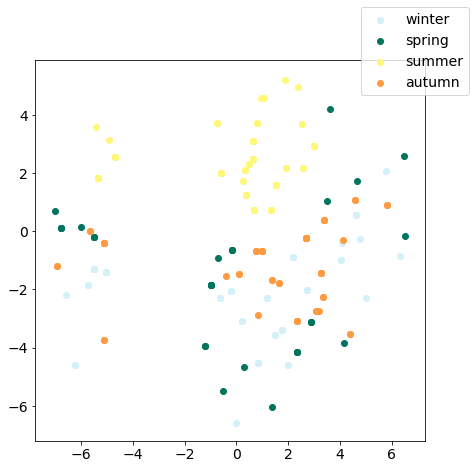

<Figure size 504x504 with 0 Axes>

In [72]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

winter_pizza = df_clean[df_clean.winter == 1].index
spring_pizza = df_clean[df_clean.spring == 1].index
autumn_pizza = df_clean[df_clean.autumn == 1].index
summer_pizza = df_clean[df_clean.summer == 1].index

winter_index = []
for i in winter_pizza:
  index = distance_matrix.index.get_loc(i)
  winter_index.append(index)

spring_index = []
for i in spring_pizza:
  index = distance_matrix.index.get_loc(i)
  spring_index.append(index)

autumn_index = []
for i in autumn_pizza:
  index = distance_matrix.index.get_loc(i)
  autumn_index.append(index)

summer_index = []
for i in summer_pizza:
  index = distance_matrix.index.get_loc(i)
  summer_index.append(index)

winter = data2D[winter_index]
spring= data2D[spring_index]
summer= data2D[autumn_index]
autumn= data2D[summer_index]

colors = ['#D4F1F9', '#00755E', '#FFF77A', '#FE9B41']

winter_plt = plt.scatter(winter[:,0], winter[:,1], color = colors[0], label = 'winter')

spring_plt = plt.scatter(spring[:,0], spring[:,1], color = colors[1], label = 'spring');

summer_plt = plt.scatter(summer[:,0], summer[:,1], color = colors[2], label = 'summer');

autumn_plt = plt.scatter(autumn[:,0], autumn[:,1], color = colors[3], label = 'autumn');

plt.figlegend()
plt.show()

plt.savefig("season_scatter.png")


In [116]:
season_df = wrangled_df[['pizza_index','season','cheese',
 'brassica',
 'summer_squash',
 'allium',
 'roots',
 'shrooms',
 'tomatoes',
 'greens',
 'flowers',
 'fruits',
 'citrus',
 'herbs',
 'fresh_cheese',
 'pasta_filata',
 'soft_ripened',
 'semi_soft',
 'wash_rind',
 'blue_cheese',
 'semi_hard',
 'hard_cheese']]

season_df.drop_duplicates(subset=['pizza_index'], keep='last', inplace=True)


def season_code(season):
    season_dict = {
        'winter': 0,
        'spring': 1,
        'summer': 2,
        'autumn': 3
    }
    x = season_dict.get(str(season))
    return x


season_df['season_code'] = season_df['season'].apply(lambda x: season_code(x))
season_df.drop(['season'], axis = 1, inplace= True)

season_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,pizza_index,cheese,brassica,summer_squash,allium,roots,shrooms,tomatoes,greens,flowers,...,herbs,fresh_cheese,pasta_filata,soft_ripened,semi_soft,wash_rind,blue_cheese,semi_hard,hard_cheese,season_code
6,0,True,False,False,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,3
14,2,False,False,False,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,2
21,4,True,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,2
26,6,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,2
32,8,True,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,484,True,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,1
1338,485,True,False,False,True,False,True,True,True,True,...,False,False,True,False,False,False,False,False,False,1
1343,486,True,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,1
1345,487,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1


In [88]:
list(df_clean.columns)[:-4]

['cheese',
 'brassica',
 'summer_squash',
 'allium',
 'roots',
 'shrooms',
 'tomatoes',
 'greens',
 'flowers',
 'fruits',
 'citrus',
 'herbs',
 'fresh_cheese',
 'pasta_filata',
 'soft_ripened',
 'semi_soft',
 'wash_rind',
 'blue_cheese',
 'semi_hard',
 'hard_cheese']

In [117]:
X = season_df[['cheese',
 'brassica',
 'summer_squash',
 'allium',
 'roots',
 'shrooms',
 'tomatoes',
 'greens',
 'flowers',
 'fruits',
 'citrus',
 'herbs',
 'fresh_cheese',
 'pasta_filata',
 'soft_ripened',
 'semi_soft',
 'wash_rind',
 'blue_cheese',
 'semi_hard',
 'hard_cheese']]
        
y = season_df['season_code']

6       3
14      2
21      2
26      2
32      3
       ..
1334    1
1338    1
1343    1
1345    1
1350    1
Name: season_code, Length: 280, dtype: int64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
# Train linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression")
print("Accuracy on training set: {:.3f}".format(linear.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(linear.score(X_test, y_test)))
# Train logistic regression model
logit = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test, y_test)))
#Train decision tree model
dtree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
print("Random Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("Gradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
#Train support vector machine model
svm = SVC().fit(X_train, y_train)
print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))
#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
print("Multilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
#Plot the variable importance
def plot_feature_importances_mydata(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(X))
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
plot_feature_importances_mydata(dtree)
plot_feature_importances_mydata(forest)
plot_feature_importances_mydata(gbrt)
plt.savefig('variableWeigths-models.png')

#Plot the heatmap on first layer weights for neural network
plt.figure(figsize=(100, 20))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(1, 10), list(X),fontsize = 50)
plt.xlabel("Columns in weight matrix", fontsize = 50)
plt.ylabel("Input feature", fontsize = 50)
plt.colorbar().set_label('Importance', size=50)
plt.savefig('firstLayer_heatMap.png')
plt.show();

Linear Regression
Accuracy on training set: 0.182
Accuracy on test set: 0.174
Logistic Regression
Accuracy on training set: 0.558
Accuracy on test set: 0.482
Decision Tree
Accuracy on training set: 0.701
Accuracy on test set: 0.571
Random Forests
Accuracy on training set: 0.701
Accuracy on test set: 0.518


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Gradient Boosting
Accuracy on training set: 0.683
Accuracy on test set: 0.607
Support Vector Machine
Accuracy on training set: 0.415
Accuracy on test set: 0.446
Multilayer Perceptron
Accuracy on training set: 0.647


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on test set: 0.536


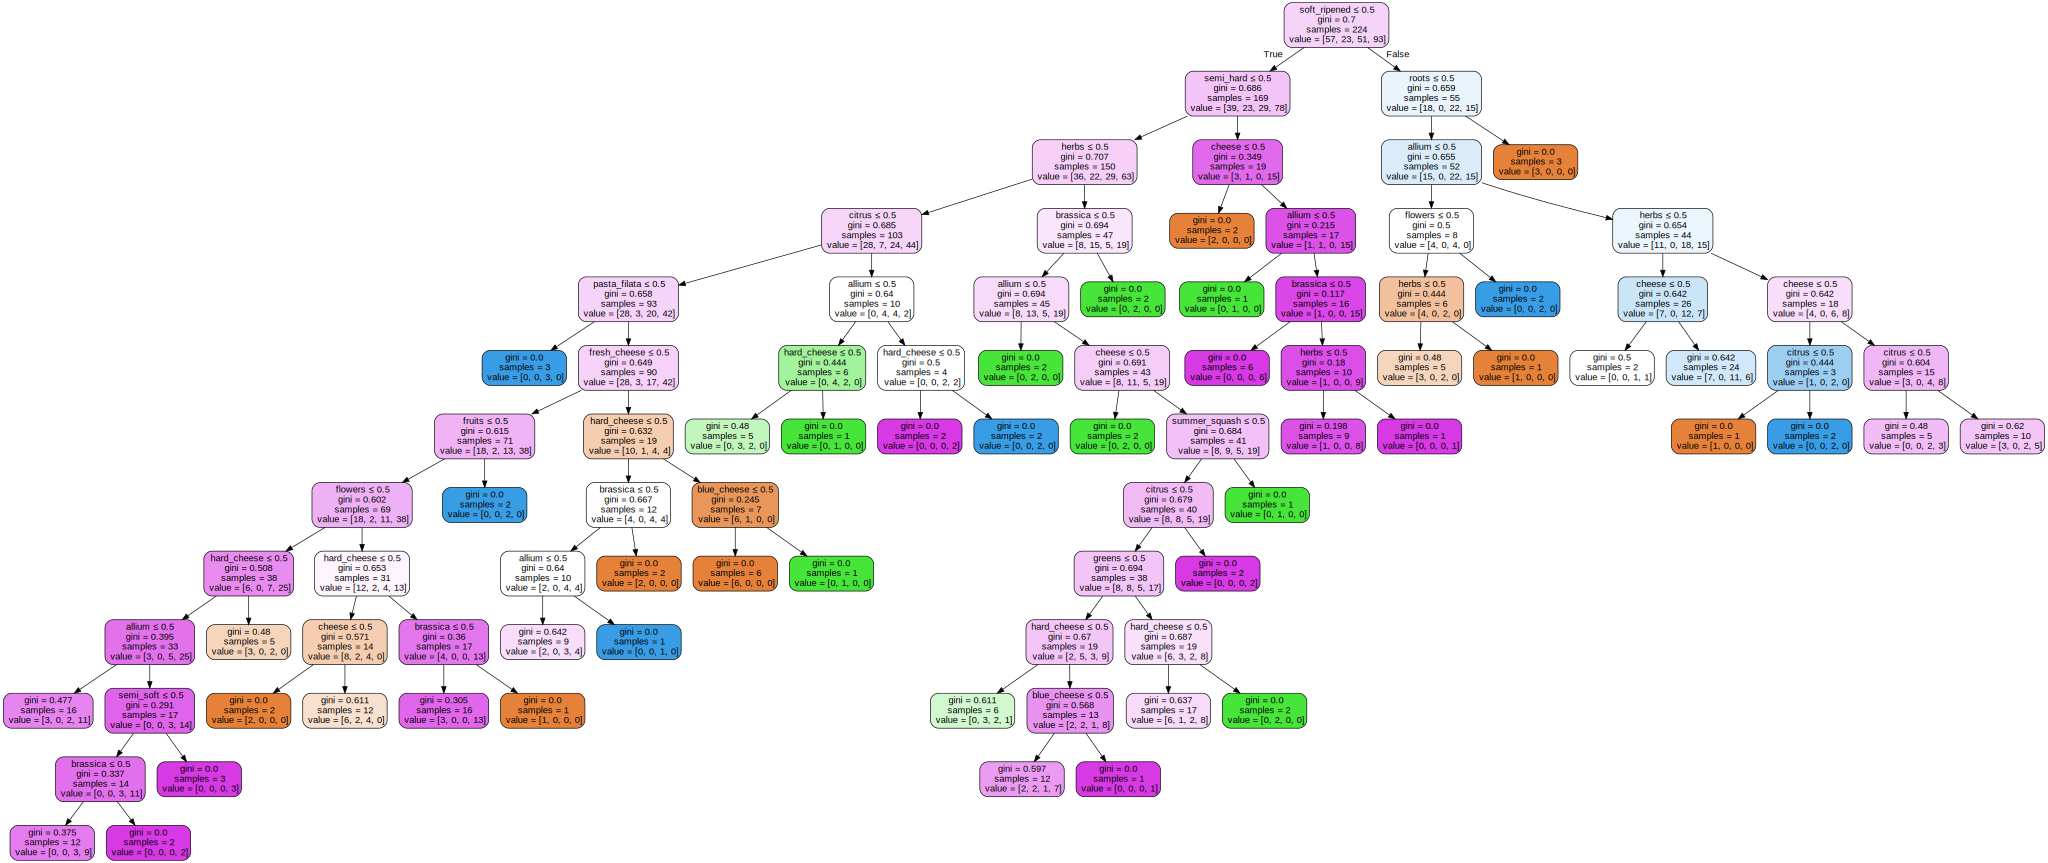

In [124]:
# explore decision tree model
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=list(X), filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 

# save image
graph.render('dtree', format = 'png')

# review image
graph